![Internet Access](img/Title.jpg)

<h1>0-Introduction</h1>

There is an interesting and perhaps very tasty principle for economists called the Big Mac Index [<sup>1</sup>](#fn1) . This principle is named the popular McDonald's sandwich[<sup>2</sup>](#fn2)  that can be found all over the world. According to this principle, the comparison of price of a Big Mac in any country with strong economic countries can be proposed as a way to quickly and easily check the economic situation of the country and also the monetary base (or M0)[<sup>3</sup>](#fn3)  there instead of using a complex economic criterion.
For example, the comparison of the price ratio of Big Mac in that country and in the United States shows whether it is reasonable the exchange rate of the currency of the mentioned country with the dollar rate has been subjected to economic manipulation, or it is a measure to check the economic well-being of that country by comparing Big Mac price with minimum wage and matching it with prosperous countries. Is the exchange rate of the mentioned country's currency with the dollar a reasonable rate, or is it subject to economic manipulation[<sup>4</sup>](#fn4) ? Or a measure is obtained to check the economic welfare of that country by comparing the price of a Big Mac with the minimum wage and comparing it with prosperous countries. <br><br>



<hr style="width:40%">
 [<sup>1</sup>]<span id="fn1"> The Big Mac index was created by The Economist to measure purchasing power parity between nations, using the price of a Big Mac as the benchmark.</span><br><br>
  [<sup>2</sup>] <span id="fn2">The Big Mac is a beef sandwich sold by the international fast food restaurant chain McDonald's.</span><br><br>
 [<sup>3</sup>] <span id="fn3"> The monetary base (or M0) is the total amount of a currency that is either in general circulation in the hands of the public or in the form of commercial bank deposits held in the central bank's reserves.</span><br><br>
 [<sup>4</sup>] <span id="fn4"> Economic manipulation includes: illicit manipulation of commodity prices; speculation; hoarding; violations of exchange regulations; breach of governmentally fixed prices, of profit margins or of price freezes; sabotage or impairing the smooth functioning of the national economy; charging excessive trade or ...</span>


![Big Mac Index](img/Bigmac.jpg)

 Access to the Internet is considered an important criterion to achieve a quick result about the welfare Index of a country, so it is of great importance to examine this issue and analyze its data.

There are 6 questions in this contest, and these questions must be answered using the data provided to us. First, let's take a look at the data:


<h1>1-The Data & EDA</h1>

⬇ Import Libraries 

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
import seaborn as sns
from IPython.display import display

In [2]:
# Some Classes
class clr:
    S = '\033[1m' + '\033[90m'
    E = '\033[0m'

In [3]:
broadband_df=pd.read_csv("data/broadband.csv")
people_df=pd.read_csv("data/people.csv")
internet_df=pd.read_csv("data/internet.csv")
region_df=pd.read_csv("data/CountriesRegion.csv")

<h2>1-1-Internet</h2>

![Internet](img/Internet.jpg)

- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2019.
- "Internet_usage" -  The share of the entity's population who have used the internet in the last three months.

In [4]:
internet_df.sample(10)

,Entity,Code,Year,Internet_Usage
1652,Early-demographic dividend,NaN,2005,4.873935
6077,Spain,ESP,2014,76.190000
1162,Chad,TCD,2006,0.581046
2584,Guatemala,GTM,2002,3.391746
6478,Tonga,TON,2003,2.985817
1256,Colombia,COL,2016,58.136494
6663,Ukraine,UKR,1995,0.043084
2187,Finland,FIN,2000,37.248462
1007,Canada,CAN,2010,80.300000
4629,Netherlands,NLD,2011,91.419996


In [5]:
print(clr.S+"The dataset has a size of:"+clr.E, internet_df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
internet_df.isna().sum()

The dataset has a size of: (7089, 4) 

Missing values:


Entity               0
Code              1328
Year                 0
Internet_Usage       0
dtype: int64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: We Have Missing value on Code and Base on DataSet Description it's because of null value for group and Region 🎉</p
</div>

In [31]:
internet_df["Internet_Usage"].describe()

count    7089.000000
mean       20.969479
std        27.488015
min         0.000000
25%         0.158150
50%         6.000000
75%        36.000000
max        99.701504
Name: Internet_Usage, dtype: float64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: Based On Statistics of Data, "Internet_Usage" seems in Percentage  🎉</p
</div>

<h2>1-2-People</h2>

![People](img/People.jpg)

- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1990 to 2020.
- "Users" - The number of people who have used the internet in the last three months for that country, region, or group.

In [6]:
people_df.sample(10)

,Entity,Code,Year,Users
4872,Saint Lucia,LCA,2012,60287
5629,Tanzania,TZA,2015,5254282
1735,El Salvador,SLV,2007,369296
4352,Norway,NOR,2016,5095109
2444,Guinea-Bissau,GNB,2009,35176
6254,Vietnam,VNM,2017,54670814
2774,Iraq,IRQ,2007,266546
669,Bermuda,BMU,2004,38277
1686,Ecuador,ECU,2020,11362233
1526,Democratic Republic of Congo,COD,2011,823851


In [7]:
print(clr.S+"The dataset has a size of:"+clr.E, people_df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
people_df.isna().sum()

The dataset has a size of: (6379, 4) 

Missing values:


Entity      0
Code      307
Year        0
Users       0
dtype: int64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: We Have Missing value on Code and Base on DataSet Description it's because of null value for group and Region 🎉</p
</div>

<h2>1-3-Broadband</h2>

![Broadband](img/Cable1.jpg)

- "Entity" - The name of the country, region, or group.
- "Code" - Unique id for the country (null for other entities).
- "Year" - Year from 1998 to 2020.
- "Broadband_Subscriptions" - The number of fixed subscriptions to high-speed internet at downstream speeds >= 256 kbit/s for that country, region, or group.

In [8]:
broadband_df.sample(10)

,Entity,Code,Year,Broadband_Subscriptions
296,Belarus,BLR,2017,33.473106
355,Benin,BEN,2016,0.205094
2341,Monaco,MCO,2013,45.787376
2479,Netherlands,NLD,2015,41.497757
1562,India,IND,2002,0.007538
2312,Moldova,MDA,2005,0.249922
2028,Lower middle income,NaN,2002,0.012741
3568,Turkmenistan,TKM,2008,0.001520
2954,Saint Lucia,LCA,2013,13.916727
1290,Georgia,GEO,2018,21.416899


In [9]:
print(clr.S+"The dataset has a size of:"+clr.E, broadband_df.shape, "\n")

print(clr.S+"Missing values:"+clr.E)
broadband_df.isna().sum()

The dataset has a size of: (3888, 4) 

Missing values:


Entity                       0
Code                       271
Year                         0
Broadband_Subscriptions      0
dtype: int64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: We Have Missing value on Code and Base on DataSet Description it's because of null value for group and Region 🎉</p
</div>

In [10]:
broadband_df["Broadband_Subscriptions"].describe()

count    3888.000000
mean       10.147989
std        12.617045
min         0.000000
25%         0.279275
50%         3.799865
75%        17.749008
max        78.524361
Name: Broadband_Subscriptions, dtype: float64

<div class="alert simple-alert">
  <p>💡<b>Note</b>: Based On Statistics of Data, "Broadband Subscription" seems in Percentage  🎉</p
</div>

<h2>1-4-Region</h2>

![Region](img/Regions.jpg)

📝 Regarding the answer to the third question,we need a table which regional category each country belongs to and so I collect it by myself.

In [11]:
region_df.sample(10)

,Countries,Region
137,Macao,East Asia & Pacific
127,Slovakia,European Union
25,Cape Verde,Africa Western and Central
114,Italy,European Union
82,Nicaragua,Latin America & Caribbean
2,Djibouti,Africa Eastern and Southern
99,Canada,North America
130,United Kingdom,European Union
27,Gambia,Africa Western and Central
74,Saint Kitts and Nevis,Latin America & Caribbean


🧪👩‍🔬 Some tailors are needed to be perfectly match on merge operation.

In [12]:
region_df['Countries']=region_df["Countries"].str.strip()
region_df

,Countries,Region
0,Burundi,Africa Eastern and Southern
1,Comoros,Africa Eastern and Southern
2,Djibouti,Africa Eastern and Southern
3,Eritrea,Africa Eastern and Southern
4,Ethiopia,Africa Eastern and Southern
...,...,...
171,India,South Asia
172,Maldives,South Asia
173,Nepal,South Asia
174,Pakistan,South Asia


<h1>2-Questions Answers </h1>

![Region](img/Answers.jpeg)

⚠ As written in all three tables in the description of the data set, the classification regions of the countries and their common groupings also appear in this table as separate records, which must be filtered to answer the question about the countries. The three-letter index of the countries was used (because the index is appeared as null for these categories) to do this. Also, another filter was added that this index must be three letters, which as you can see, also, another filter was added to ensure that this index is three letters, as you can see, this index was used to filter the overall statistics of the world and the Kosovo [<sup>5</sup>](#fn5).<br><br>



<hr style="width:40%">
 [<sup>5</sup>]<span id="fn5">Kosovo officially the Republic of Kosovo is a partially recognised state in Southeast Europe. </span>

<h2>First Question:</h2>

1. What are the top 5 countries with the highest internet use (by population share)?

In [34]:
Answer_1=internet_df[( ~ internet_df["Code"].isnull())&(internet_df["Code"].map(str).apply(len)==3)]\
  .groupby("Entity")["Internet_Usage"].agg(['mean']).sort_values(['mean'],ascending=False).reset_index().head(5)
Answer_1.columns=["Country","Internet Share"]
print(clr.S+"Top 5 countries with the highest internet use:"+clr.E)
Answer_1

Top 5 countries with the highest internet use:


,Country,Internet Share
0,Curacao,64.991363
1,Iceland,62.293549
2,Norway,61.851339
3,Sweden,59.268944
4,Denmark,58.460243


🔔 I was completely shocked when I saw the answer to the first question, in that we obtained the average data in different years to compare the highest level of Internet access, I have to admit that I had never heard the name of the first country, and had to search on Google to find out where it is. But absolutely everything was in line with the expectations regarding the second to fifth places. These countries have all been recognized as the best countries in terms of welfare level and it is natural that they got the top positions in this survey. 

<h2>Second Question:</h2>

2. How many people had internet access in those countries in 2019?

In [46]:
Answer_2=pd.merge(Answer_1,people_df,left_on='Country',right_on='Entity',how='left')
Answer_2=Answer_2[Answer_2["Year"]==2019][['Entity','Users']].sort_values("Users",ascending=False).reset_index(drop=True)
Answer_2.columns=["Country","Users"]
Answer_2["Users"]=Answer_2["Users"]/1000000
Answer_2.columns=["Country","Users (Millions)"]
print(clr.S+"Number of people had internet access in those countries in 2019:"+clr.E)
Answer_2

Number of people had internet access in those countries in 2019:


,Country,Users (Millions)
0,Sweden,9.702513
1,Denmark,5.682653
2,Norway,5.241320
3,Iceland,0.357179


🔔 It was also a bit challenging to answer the second question. As you can see, no information can be found about the Curacao in 2019 due to the merge between the results of the first question and this table, but the leader of the statistics is as follows for the rest of the countries.

<h2>Third Question:</h2>

3. What are the top 5 countries with the highest internet use for each of the following regions: 'Africa Eastern and Southern', 'Africa Western and Central', 'Latin America & Caribbean', 'East Asia & Pacific', 'South Asia', 'North America', 'European Union'?

📝 Regarding the answer to the third question, either an error was made in sending the data or the ability to collect the data of the participants was assessed, because in none of the presented tables it was written which regional category each country belongs to, and it should This table was prepared by the participants themselves, in any case, it was impossible to answer this question without having this table, and it was difficult to prepare the table for two reasons.

1.	There is no precise and explicit criterion for the classification of countries in terms of regions, and there is a significant difference in this matter.
2.	Some countries have different titles and are not necessarily the same as the name mentioned in the data. So it is necessary to do equalization manually.

On the other hand, these differences of opinion in the division will cause that there will probably not be unique correct answers.
Anyway, the result can be mentioned as follows after searching and finding the division that there is almost a consensus on it.


In [71]:
Third_answer=pd.merge(internet_df,region_df,left_on='Entity',right_on='Countries')
Third_answer=Third_answer.groupby(["Entity","Region"])['Internet_Usage'].agg(['mean']).sort_values('mean',ascending=False).reset_index()
Third_answer=Third_answer.groupby("Region").head(5).sort_values(by=["Region","mean"],ascending=[True,False]).reset_index(drop=True)
for Region in sorted(list(set(Third_answer["Region"]))):
            print(clr.S+"Top 5 Countries in :          "+clr.E+'\x1B[3m'+Region+'\x1B[0m')       
            Temp_df=Third_answer[Third_answer["Region"]==Region][["Entity",'mean']].reset_index(drop=True)
            Temp_df.index=np.arange(1, len(Temp_df) + 1)
            Temp_df.columns=["Countries","Share Of Internet Use"]
            display(Temp_df)
            print('\n')
# Third_answer

Top 5 Countries in :          Africa Eastern and Southern


,Countries,Share Of Internet Use
1,Seychelles,23.107159
2,Mauritius,20.681014
3,South Africa,15.806138
4,Botswana,9.274648
5,Namibia,7.088230




Top 5 Countries in :          Africa Western and Central


,Countries,Share Of Internet Use
1,Cape Verde,14.828820
2,Sao Tome and Principe,11.874641
3,Gabon,11.125883
4,Ghana,6.708811
5,Senegal,6.533151




Top 5 Countries in :          East Asia & Pacific


,Countries,Share Of Internet Use
1,South Korea,54.095098
2,New Zealand,50.699451
3,Japan,49.030426
4,Australia,48.202448
5,Singapore,47.946487




Top 5 Countries in :          European Union


,Countries,Share Of Internet Use
1,Sweden,59.268944
2,Denmark,58.460243
3,Netherlands,57.863895
4,Finland,56.271544
5,United Kingdom,52.441422




Top 5 Countries in :          Latin America & Caribbean


,Countries,Share Of Internet Use
1,Cayman Islands,44.827210
2,Barbados,36.358693
3,Aruba,36.298887
4,Saint Kitts and Nevis,31.118344
5,Uruguay,29.241528




Top 5 Countries in :          North America


,Countries,Share Of Internet Use
1,Bermuda,53.756125
2,Canada,52.252901
3,United States,50.162525
4,Greenland,39.353280




Top 5 Countries in :          South Asia


,Countries,Share Of Internet Use
1,Maldives,17.062356
2,Bhutan,8.939621
3,Sri Lanka,6.594811
4,India,5.815671
5,Pakistan,5.706616


🔔 The difference in the level of Internet access among the top countries of each region is very surprising and unfortunate at first glance. For example, this amount includes about half of the country's population in the European Union or North America, but this amount is extremely low and under ten percent in Africa or South Asia, and this is only for the top countries in that region.

<h2>Fourth Question:</h2>

4. Create a visualization for those five regions' internet usage over time.

The growth rate of Internet access  from 1990 to 2020:


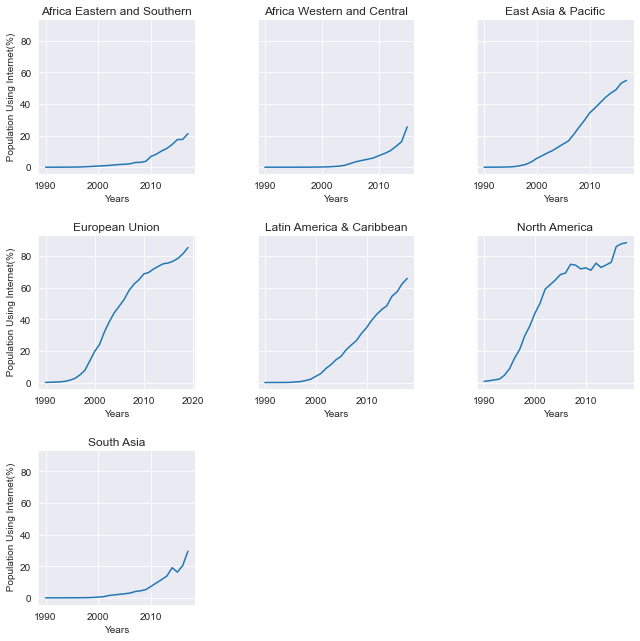

In [94]:
Fourth_Answer=internet_df[internet_df["Code"].isnull()].groupby(["Entity","Year"])["Internet_Usage"].agg(['mean'])
Fourth_Answer=Fourth_Answer[Fourth_Answer.index.get_level_values('Entity').isin(region_df["Region"])].reset_index()
sns.set_style('darkgrid')

Order_Region=sorted(list(set(Fourth_Answer['Entity'])))
g=sns.FacetGrid(Fourth_Answer,col='Entity',col_wrap=3,row_order=Order_Region,sharex=False,sharey=True)
g.map(sns.lineplot,'Year','mean')
plt.subplots_adjust(hspace=0.4, wspace=0.4)
axes = g.axes.flatten()
print(clr.S+"The growth rate of Internet access  from 1990 to 2020:"+clr.E)
for idx,region in enumerate(Order_Region):
    axes[idx].set_title(region)
    axes[idx].set_xlabel("Years")
    axes[idx].set_ylabel(" Population Using Internet(%)")


In [95]:
Fourth_Answer=Fourth_Answer.groupby('Entity')['mean'].agg(['min','max']).reset_index()
Fourth_Answer['Growth']=(Fourth_Answer['max']-Fourth_Answer['min'])/30

In [98]:
Fourth_Answer.sort_values('Growth',ascending=False)

,Entity,min,max,Growth
5,North America,0.742836,88.498903,2.925202
3,European Union,0.066722,85.429123,2.845413
4,Latin America & Caribbean,0.000000,65.897182,2.196573
2,East Asia & Pacific,0.007211,54.925229,1.830601
6,South Asia,0.000000,29.503040,0.983435
1,Africa Western and Central,0.000000,25.570184,0.852339
0,Africa Eastern and Southern,0.000000,21.281831,0.709394


In response to the fourth question, it should be said that, as can be observed in the figure, the level of Internet access has grown with a suitable slope regardless of the regional division and its starting and ending points in all cases, and has been accompanied by growth in all regions so that Region North America with 2.92 has the highest average growth  and region Africa Eastern and Southern with 0.709 has the lowest average growth .

<h2>Fifth Question:</h2>

5. What are the 5 countries with the most internet users?

In [99]:
Answer_5=people_df[( ~ people_df["Code"].isnull())&(people_df["Code"].map(str).apply(len)==3)]\
  .groupby("Entity")["Users"].agg(['mean']).sort_values(['mean'],ascending=False).reset_index().head(5)
Answer_5.columns=["Country","Users (Milion)"]
Answer_5['Users (Milion)']=Answer_5["Users (Milion)"]/1000000
Answer_5

,Country,Users (Milion)
0,China,299.029080
1,United States,163.553625
2,India,94.917555
3,Japan,65.870864
4,Brazil,55.999180


🔔 In response to the fifth question, it can be said that, as expected, in terms of the average number of people who had access to the Internet during these years of study, the most populous countries were placed in the upper ranks of this division, But Japan, with its average population, is in the middle of this table, which indicates that the people of this country have high access to the Internet.

<h2>Sixth Question:</h2>

6. What is the correlation between internet usage (population share) and broadband subscriptions for 2019?

In [100]:
Answer_6=pd.merge(internet_df[internet_df['Year']==2019],broadband_df[broadband_df["Year"]==2019],on='Code')\
        [["Entity_x",'Internet_Usage','Broadband_Subscriptions']]
Answer_6=Answer_6.rename(columns = {'Entity_x':'Countries'})
correlation=pearsonr(Answer_6["Internet_Usage"],Answer_6["Broadband_Subscriptions"])
correlation[0]
# Answer_6

0.3072985526052843

🔔 Contrary to expectation, the correlation number is a number far from 1 and much closer to zero, which shows that maybe internet users do not want to buy internet subscriptions and tend to use other methods of accessing the internet such as mobile internet or shared internet such as universities or libraries and or free services such as restaurants and coffee shops. 

<h1>Conclusion:</h1>

As expected, the level of the Internet access is also higher in countries with a high welfare level than other countries, and this difference becomes very significant in the regional analysis, as it is several times higher in the top countries of each region compared to other countries.
But the level of Internet access has grown everywhere in consecutive years regardless of the geographical region and as expected, most of the populated countries have the highest number of Internet users. Over the years, the way to connect to the Internet has also changed, and instead of buying an Internet subscription, workers have started using other methods of connection, such as mobile or shared Internet.
